<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

Saving HeartDisease.csv to HeartDisease.csv


In [2]:

# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Load dataset
file_path = "HeartDisease.csv"  # Sesuaikan path jika diperlukan
df = pd.read_csv(file_path)

# Menampilkan beberapa baris awal
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:

# Mengecek missing values
df.isnull().sum()

# Mengisi missing values (jika ada)
df = df.dropna()

# Memisahkan fitur dan target
X = df.drop(columns=['num'])  # Sesuaikan dengan nama kolom target jika berbeda
y = df['num']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
from sklearn.preprocessing import label_binarize
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Compute AUC-ROC (binarizing the output for multi-class)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
auc_roc = roc_auc_score(y_test_bin, y_pred_proba, average='weighted', multi_class='ovr')

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")


Accuracy: 0.5500
Precision: 0.4608
Recall: 0.5500
F1-Score: 0.4979
AUC-ROC: 0.8619


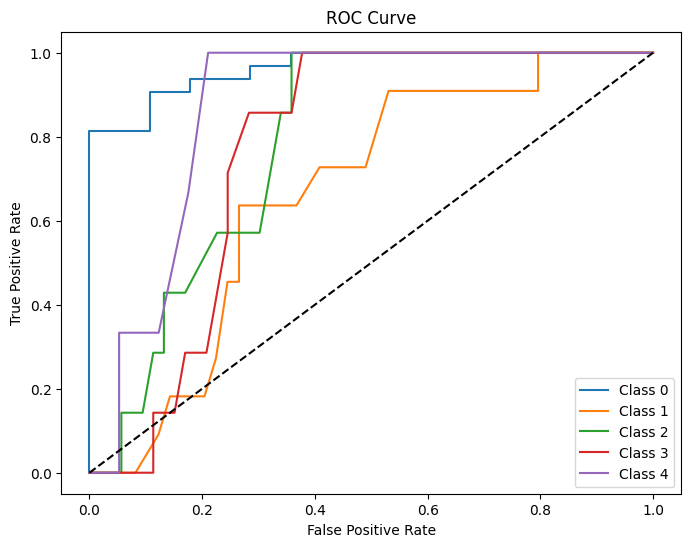

In [11]:

# Menampilkan grafik ROC Curve

plt.figure(figsize=(8, 6))
for i in range(5):  # 5 classes (0-4)
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## **📌 Penjelasan Persamaan Matematika dalam Evaluasi Model**

Dalam evaluasi model *machine learning*, beberapa metrik digunakan untuk menilai performa model. Berikut adalah penjelasan masing-masing metrik dan persamaan matematikanya:

---

### **1. Akurasi (Accuracy)**
Akurasi mengukur seberapa banyak prediksi yang benar dibandingkan dengan keseluruhan data.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

- **TP** (*True Positive*): Prediksi positif yang benar  
- **TN** (*True Negative*): Prediksi negatif yang benar  
- **FP** (*False Positive*): Prediksi positif yang salah (*kesalahan tipe I*)  
- **FN** (*False Negative*): Prediksi negatif yang salah (*kesalahan tipe II*)  

> **Interpretasi:** Semakin tinggi akurasi, semakin baik model dalam mengklasifikasikan data secara keseluruhan.

---

### **2. Presisi (Precision)**
Presisi mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan seluruh prediksi positif.

$$\text{Precision} = \frac{TP}{TP + FP}$$

> **Interpretasi:**  
- Nilai presisi tinggi menunjukkan bahwa model jarang memberikan prediksi positif yang salah (*false positive*).  
- Cocok untuk kasus di mana kesalahan *false positive* harus diminimalkan (misalnya, diagnosis penyakit serius).

---

### **3. Recall (Sensitivity / True Positive Rate)**
Recall mengukur seberapa banyak kasus positif yang benar-benar terdeteksi.

$$\text{Recall} = \frac{TP}{TP + FN}$$

> **Interpretasi:**  
- Nilai recall tinggi berarti model mampu menangkap banyak kasus positif.  
- Cocok untuk kasus di mana kesalahan *false negative* harus diminimalkan (misalnya, pendeteksian kanker dalam tes medis).

---

### **4. F1 Score**
F1 Score adalah rata-rata harmonik dari *Precision* dan *Recall*. Digunakan untuk menyeimbangkan keduanya, terutama jika dataset tidak seimbang.

$$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

> **Interpretasi:**  
- Nilai **F1 Score** tinggi berarti model memiliki keseimbangan antara presisi dan recall.  
- Berguna dalam kasus di mana dataset memiliki distribusi kelas yang tidak seimbang.

---

### **5. Area Under Curve (AUC) & Receiver Operating Characteristic (ROC)**
AUC adalah ukuran seberapa baik model dapat membedakan antara kelas positif dan negatif.  
ROC Curve adalah grafik yang menunjukkan hubungan antara **True Positive Rate (TPR)** dan **False Positive Rate (FPR)**.

**Persamaan untuk False Positive Rate (FPR):**
$$\text{FPR} = \frac{FP}{FP + TN}$$

**Persamaan untuk True Positive Rate (TPR):**
$$\text{TPR} = \frac{TP}{TP + FN}$$

> **Interpretasi:**  
- Jika **AUC = 1**, model sempurna dalam membedakan kelas positif dan negatif.  
- Jika **AUC = 0.5**, model tidak lebih baik dari tebakan acak.  
- Jika **AUC < 0.5**, model lebih buruk dari tebakan acak (perlu diperbaiki).  
